In [17]:
import pandas as pd
import numpy as np
import time
import matplotlib as plt

# 1 - Number  of picked up travels per time zone

Start program time count, read datasets available and concatenate them

In [18]:
start = time.time()

data1 = pd.read_csv("DATA/tripdata_2017-01.csv")
data2 = pd.read_csv("DATA/tripdata_2017-02.csv")
data = pd.concat([data1,data2])

Change the format of variable to datetime and extract the hour

In [19]:
data['tpep_pickup_datetime'] = data['tpep_pickup_datetime'].astype('datetime64[ns]') 
data['tpep_pickup_hour'] = data.tpep_pickup_datetime.dt.hour

Convert the discrete variable to continuous variable

In [20]:
col         = 'tpep_pickup_hour'
conditions  = [ (data[col] >= 0) & (data[col] < 6), 
                (data[col]>= 6) & (data[col] < 12), 
               (data[col]>= 12) & (data[col] < 18),
               (data[col]>= 18) & (data[col] <= 24) 
  ]
choices     = [ 'N', 'M', 'A', 'E']
    
data["tpep_pickup_hour_timezone"] = np.select(conditions, choices, default=np.nan)

Now there are only four categories which express the time zone. Print categories of the new variable

In [21]:
print(data['tpep_pickup_hour_timezone'].unique())

['M' 'N' 'E' 'A']


Show relative frecuencies

In [22]:
print(data['tpep_pickup_hour_timezone'].value_counts())

E    631164
A    566760
M    473142
N    271354
Name: tpep_pickup_hour_timezone, dtype: int64


Barlot of the new variable created

Text(0.5, 0, 'Categories')

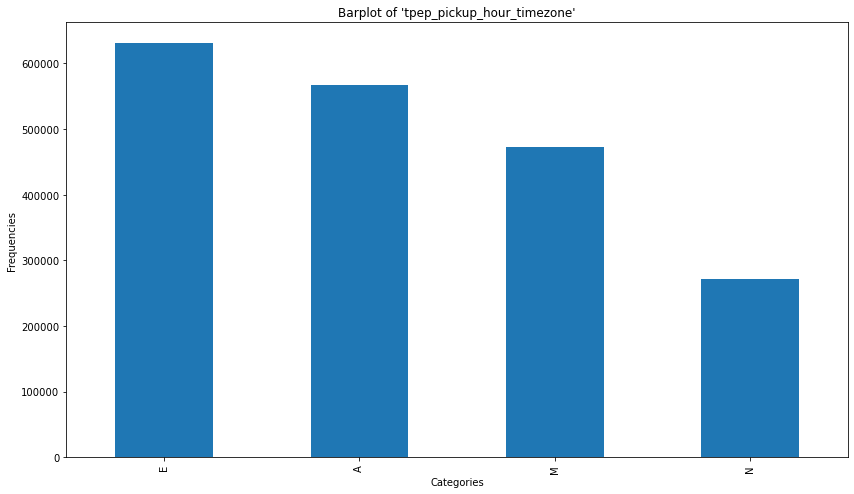

In [23]:
plot = data['tpep_pickup_hour_timezone'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Barplot of 'tpep_pickup_hour_timezone'")

plot.set_ylabel('Frequencies')
plot.set_xlabel('Categories')

# 2 -  Average total price per trip excluding taxes

We select the columns corresponding to the fare, tip, tolls and extra amount and the improvement surcharge, excluding the taxes and we add them together.

In [24]:
no_taxes = data['fare_amount'] + data['tip_amount'] + data['tolls_amount'] + data['extra'] + data['improvement_surcharge']

Now, we compute the mean of this quantity.

In [25]:
meanprice=no_taxes.mean()
print (meanprice, 'No taxes mean')

15.353715345033166 No taxes mean


Let's compare this mean value to the mean of the total amount given to the driver.

In [26]:
total = data['total_amount']
total_mean = total.mean()
print (total_mean, 'Total amount mean')

15.854891789885082 Total amount mean


We can see that there is a difference of close to 0.5$ between these amounts, meaning that the fraction of the total amount spent in taxes is close to 0.5$ for every trip. Let's check this fact: 

In [27]:
print(data['mta_tax'].mean())

0.4974637874404095


# 3 - Type of payment in terms of different pick up zones

We are going to try first to do an analysisis that uses serial computation and basic libraries from python to analyse the mean price of travels for the different pick-up zones and payment methods.

We see that we have four levels for the payment method:

 - Credit Card "1"
 - Cash "2"
 - No charge "3"
 - Dispute "4"

<AxesSubplot:xlabel='DOLocationID'>

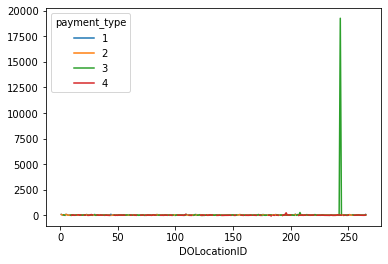

In [28]:
fourth_analysis=data.loc[:,['DOLocationID','payment_type','total_amount']]
fourth_analysis.groupby(['DOLocationID','payment_type'])['total_amount'].mean().unstack().plot()

We can see that there must be an error on on or few observations as the mean price for one of the zones goes up to almost 20000 dollars, therefore we are now going to remove it visualice a more reasonable plot.

<AxesSubplot:xlabel='DOLocationID'>

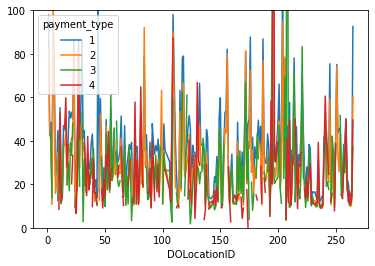

In [29]:
plot_fourth_analysis=fourth_analysis.index[(fourth_analysis['total_amount']>1000) | (fourth_analysis['total_amount']<0)]
fourth_analysis=fourth_analysis.drop(plot_fourth_analysis,axis=0)
fourth_analysis.groupby(['DOLocationID','payment_type'])['total_amount'].mean().unstack().plot(ylim=[0,100],)

As we can see, in general, the payment method most used for the most expensive trips is isually by credit card. However there is also a lot of trips that are out of charge and that those trips with disputes to pay are for low amounts.

Now let's check how is the mean price distributed for each payment method.

payment_type
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
4    AxesSubplot(0.125,0.125;0.775x0.755)
Name: total_amount, dtype: object

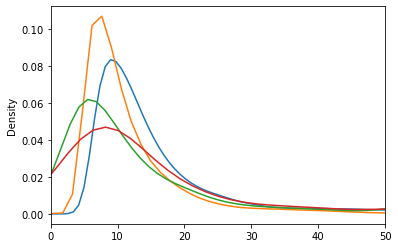

In [30]:
fourth_analysis.groupby(["payment_type"])["total_amount"].plot(kind='density',xlim=[0,50],xlabel="Price")

We can see that morarles the main payment price is concentrated over the same quantity, between 5 and 10 dollars. Nevertheless we can see that in general most payment method used is the cash and the mean value of trips is a little bit lower than the credit ones. 

Now that we have completed our analysis using a serial version of our problem we can check the system time requiered for it.

In [31]:
stop=time.time()
print(stop-start)

23.831734895706177
